# Telcom Customer Churn Analysis

Customer Churn Analysis focuses on understanding why customers stop using a company’s services.
In this project, telecom customer data is analyzed to identify key factors that influence customer churn. The analysis includes customer demographics, service usage, contract details, and billing information.

The goal of this project is to extract meaningful insights that can help businesses improve customer retention, reduce churn rate, and make data-driven decisions.



1. Import Required Libraries

In [2]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2. Load the dataset

In [3]:
#Load csv file
df = pd.read_csv("Customer Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


3. Dataset overview

In [4]:
#DataFrame Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


4. Handle Missing Values

Replacing blanks with 0 as Tenure is 0 and no Total Charges are recorded

In [5]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

5. Checking Update, datatype conversion

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The TotalCharges column is converted from object type to numeric to ensure accurate calculations.

6. Checking Null/ Empty Values and Duplicate Values

In [7]:
#Checks overall null values
df.isnull().sum().sum()

np.int64(0)

In [8]:
#Check overall stats
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
#Check overall duplicate
df.duplicated().sum()

np.int64(0)

7. Exploratory Data Analysis (EDA)

In [10]:
#Count of Churn for 'yes' and 'no'
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [11]:
#Changing the numeric values into object
def conv(value):
    if value == 1:
        return 'yes'
    else:
        return 'no'
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

Converted 0 and 1 values of Senior Citizen to yes/no for better understanding

In [12]:
df['SeniorCitizen'].head(25)

0      no
1      no
2      no
3      no
4      no
5      no
6      no
7      no
8      no
9      no
10     no
11     no
12     no
13     no
14     no
15     no
16     no
17     no
18     no
19     no
20    yes
21     no
22     no
23     no
24     no
Name: SeniorCitizen, dtype: object

8. Churn Distribution Analysis

Customer churn is analyzed based on:
- Gender
- Senior citizen status
- Partner
- dependent information

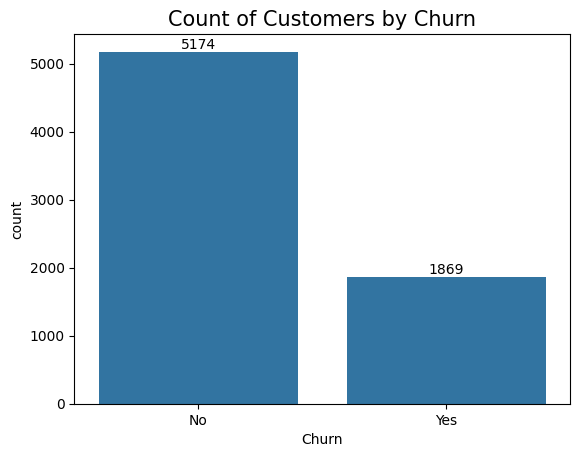

In [13]:
ax = sns.countplot(x = 'Churn', data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn", fontsize = 15)
plt.show()

This chart displays the count of churned and non-churned customers, giving a quick view of customer retention in the dataset.

9. Churn Percentage Distribution

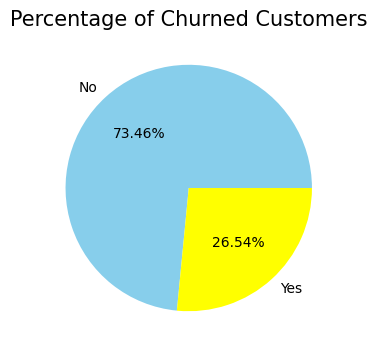

,Churn
Churn,
No,5174
Yes,1869


In [14]:
plt.figure(figsize = (4,4))
gb = df.groupby('Churn').agg({'Churn':'count'})
plt.pie(gb['Churn'], labels = gb.index, autopct = '%1.2f%%', colors = ['skyblue','yellow'])
plt.title("Percentage of Churned Customers", fontsize = 15)
plt.show()
gb

From the given pie chart we can conclude that 26.54% of our customers have churned out.
Now, Let's explore the reason behind it

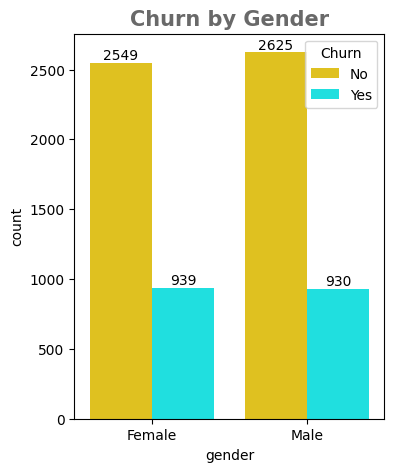

In [15]:
plt.figure(figsize = (4,5))
ax = sns.countplot(x = "gender", data = df, hue = "Churn", palette = ['gold','Cyan'])
ax.bar_label(ax.containers[0], label_type = 'edge')
ax.bar_label(ax.containers[1], label_type = 'edge')
plt.title('Churn by Gender', fontsize = 15, fontweight = 'bold', color = 'dimgray')
plt.show()

Gender does not seem to be a significant differentiator in churn behavior in this dataset. As analysis should focus on more impactful variables, let's look for some other variables

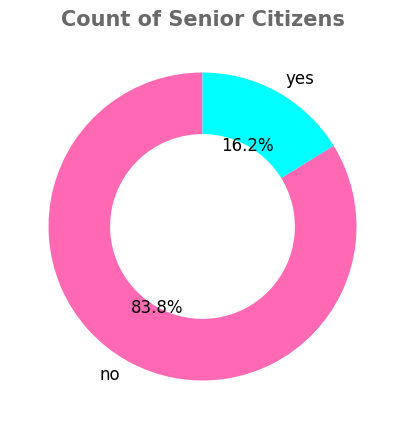

In [16]:
#Count of Senior Citizens
counts = df['SeniorCitizen'].value_counts()

# Donut chart
plt.figure(figsize=(5,5))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['hotpink', 'cyan'], startangle=90, textprops={'fontsize':12}, wedgeprops ={'width':0.4})
plt.title('Count of Senior Citizens', fontsize=15, fontweight='bold', color='dimgray')
plt.show()

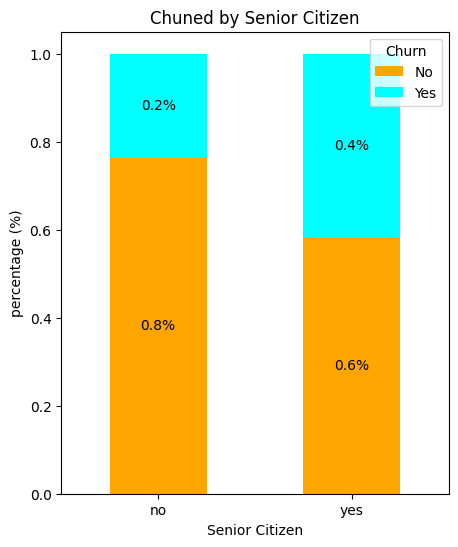

In [17]:
#Churn Analysis by Senior Citizen Status
total_counts = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize = True).unstack()
fig, ax = plt.subplots(figsize=(5,6))
total_counts.plot(kind = 'bar', stacked = True, ax = ax, color = ['orange', 'cyan'])
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width /2, y + height /2, f'{height:.1f}%', ha = 'center', va = 'center')
plt.title('Chuned by Senior Citizen')
plt.xlabel('Senior Citizen')
plt.ylabel('percentage (%)')
plt.xticks(rotation = 0)
plt.legend(title = 'Churn', loc = 'upper right')
plt.show()

comparative a greater percentage of customer in senior citizen category have churned.

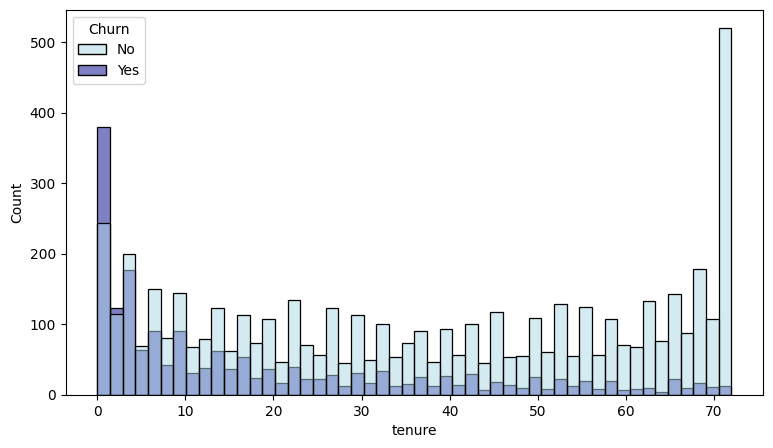

In [18]:
plt.figure(figsize=(9,5))
sns.histplot(x = 'tenure', data = df, bins = 50, hue = 'Churn', palette = ['lightblue','darkblue'])
plt.show()

People who have used our services for a long time have stayed and people who have used our services for one or two months have churned

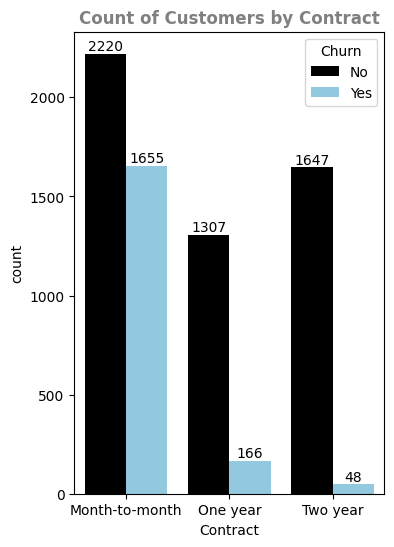

In [22]:
plt.figure(figsize = (4,6))
ax = sns.countplot(x = 'Contract', data = df, hue = 'Churn', palette = ['black','skyblue'])
ax.bar_label(ax.containers[0], label_type = 'edge')
ax.bar_label(ax.containers[1], label_type = 'edge')
plt.title('Count of Customers by Contract', fontweight = 'bold', color = 'gray')
plt.show()

Customers who have month to month contract are likely to churn then from those who have one or two years of contract

In [23]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

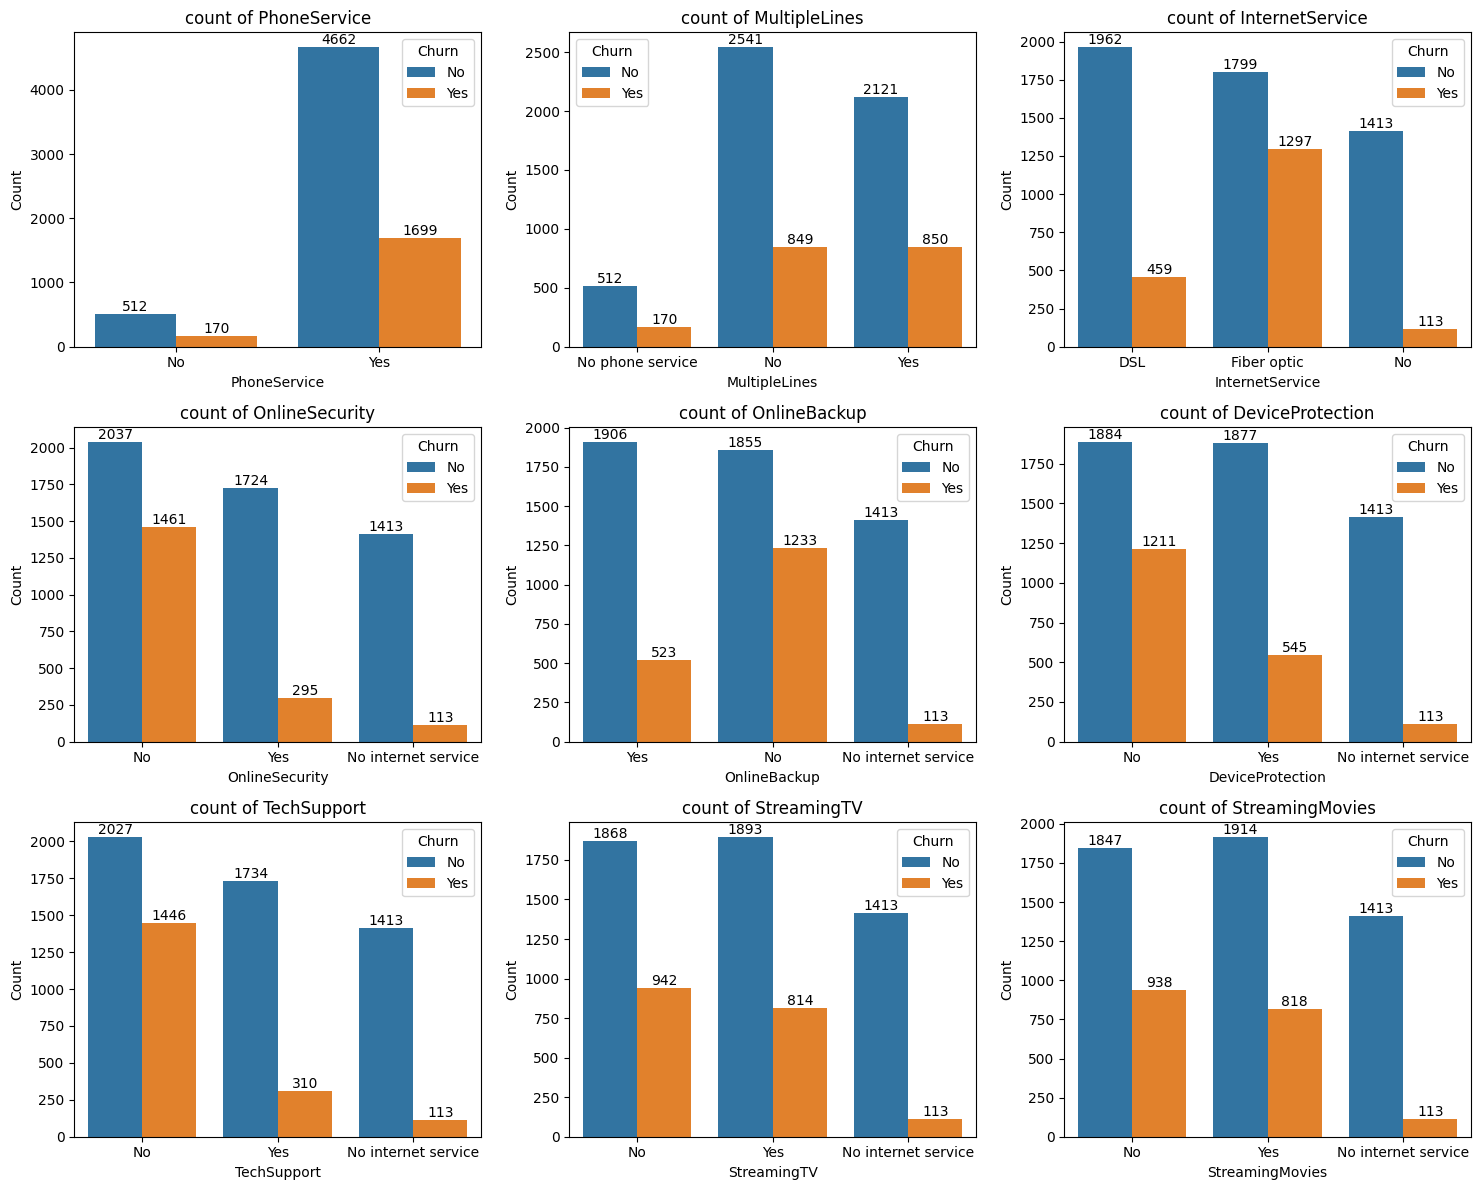

In [24]:
#Customer Services VS Customer Churn

#List of categorical columns
cols = ['PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies']

#set-up the sub-plot grid
n_cols = 3
n_rows = (len(cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()
for i, col in enumerate(cols):
    ax = axes[i]
    sns.countplot(x=col, data=df, ax=axes[i], hue = df['Churn'])
    axes[i].set_title(f'count of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    
    #Add bar labels
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge')

#remove empty subplots
for j in range(i + 1,len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

Customers who do not use value-added services (Online Security, Tech Support, Backup, Device Protection) show a higher churn rate.
Fiber Optic users have higher churn compared to DSL, while customers with more service subscriptions are more likely to stay.

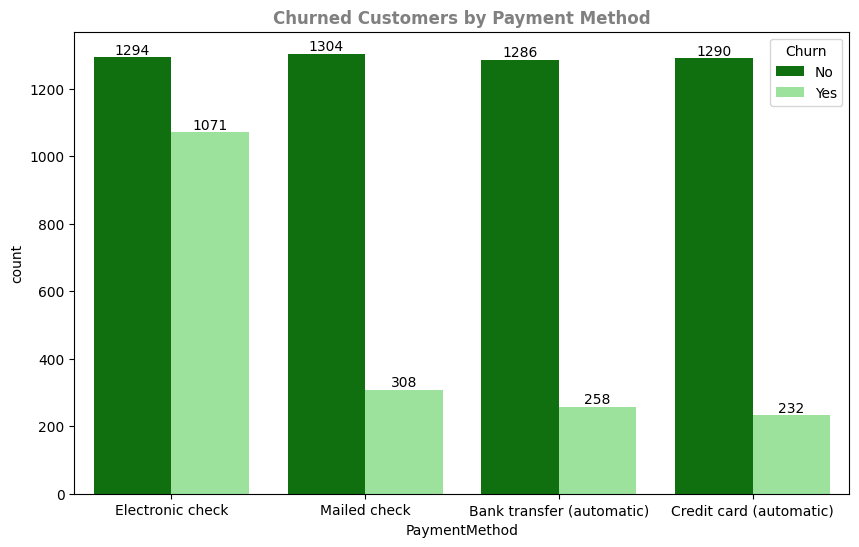

In [25]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x = 'PaymentMethod', data = df, hue = 'Churn', palette = ['green', 'lightgreen'])
ax.bar_label(ax.containers[0], label_type = 'edge')
ax.bar_label(ax.containers[1], label_type = 'edge')
plt.title('Churned Customers by Payment Method', fontweight = 'bold', color = 'gray')
plt.show()

 people using electronic check as payment method likely to churn more

# Key Insights from Customer Churn Analysis: 

- Customers with month-to-month contracts have a significantly higher churn rate compared to long-term contracts.
- Fiber Optic internet users show higher churn than DSL users, indicating possible cost or service-related concerns.
- Customers who do not use value-added services such as Online Security, Tech Support, Device Protection, and Online Backup are more likely to churn.
- New customers with low tenure are at a higher risk of leaving compared to long-term customers.
- Higher monthly charges are associated with increased churn, especially among customers with fewer services.
- Customers using automatic payment methods (credit card or bank transfer) tend to have lower churn rates than those using manual payments.

# Colclusion

This analysis highlights the key factors contributing to customer churn in a telecom business.
The insights from this project can help organizations identify high-risk customers and design effective retention strategies.